In [1]:
# Importieren der notwendigen Bibliotheken
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import shap
import matplotlib.pyplot as plt
from xgboost import plot_tree
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import seaborn as sns
acc = []
model = []

# Laden des Datensatzes
file_path = 'Crop_recommendation.csv'  # Stellen Sie sicher, dass sich die Datei im gleichen Verzeichnis befindet
data = pd.read_csv(file_path)

#sns.heatmap(data.corr(),annot=True)

# Features und Zielvariable definieren
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# XGBoost-Modell initialisieren und trainieren
XB = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
XB.fit(X_train, y_train)

# Vorhersagen
predicted_values = XB.predict(X_test)

# Genauigkeit und Bericht
accuracy = accuracy_score(y_test, predicted_values)
print(f"XGBoost's Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, predicted_values, target_names=label_encoder.classes_))



c:\Users\zauch\Documents\GIT\cropRecommendation\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\zauch\Documents\GIT\cropRecommendation\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:37:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost's Accuracy: 98.64%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.96      0.96      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       0.95      1.00      0.97        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14


In [5]:
print(f"X_test Shape: {X_test.shape}")
print(f"Features: {list(X.columns)}")


X_test Shape: (440, 7)
Features: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


In [6]:
# SHAP-Explainer erstellen
explainer = shap.TreeExplainer(XB)
shap_values = explainer(X_test)

# SHAP-Werte auf tatsächliche Feature-Anzahl beschränken
shap_values_trimmed = shap_values.values[:, :, :X_test.shape[1]]  # Beschränken auf 7 Features
print(f"Trimmed SHAP Values Shape: {shap_values_trimmed.shape}")


Trimmed SHAP Values Shape: (440, 7, 7)


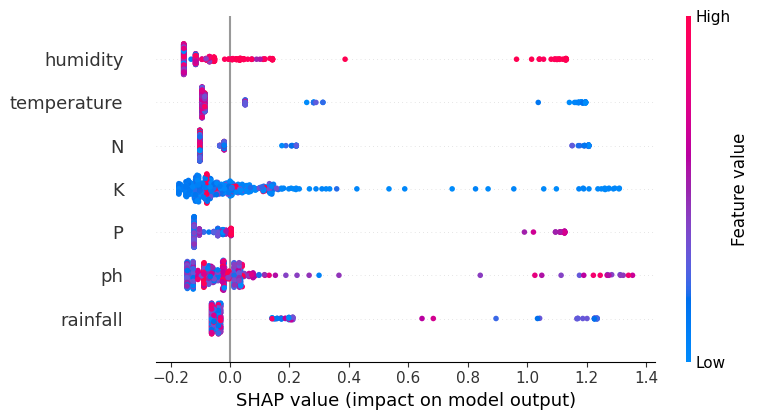

In [7]:
# Globale Analyse: Aggregierte SHAP-Werte über Klassen
shap_values_aggregated = shap_values_trimmed.mean(axis=1)
shap.summary_plot(shap_values_aggregated, X_test, feature_names=X.columns)


In [10]:
# JavaScript initialisieren für SHAP
shap.initjs()


Predicted Class: muskmelon


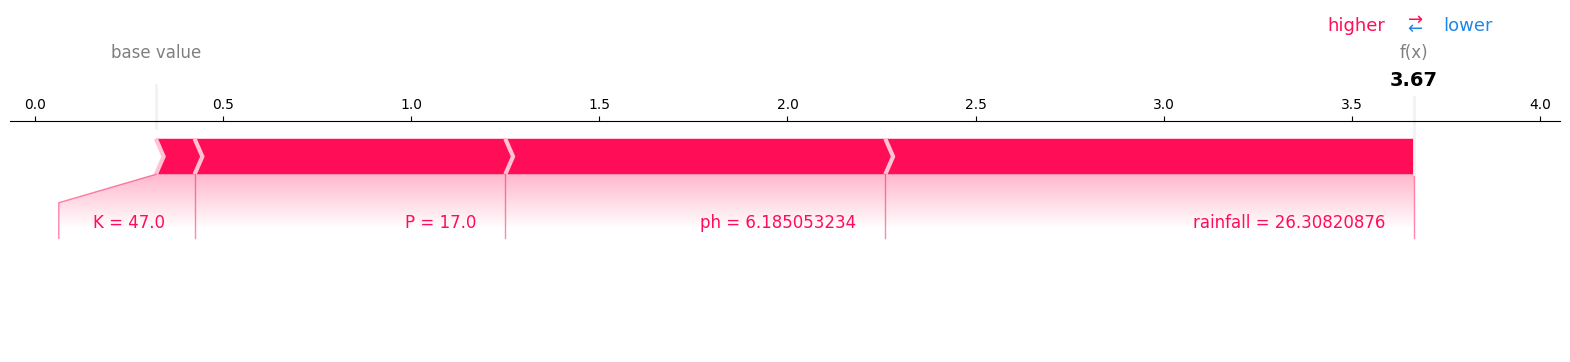

In [27]:
sample_idx = 0  # Beispiel-Index
class_idx = 0   # Index der Klasse

predicted_class = label_encoder.inverse_transform([XB.predict(X_test.iloc[sample_idx, :].values.reshape(1, -1))[0]])[0]
print(f"Predicted Class: {predicted_class}")

shap.force_plot(
    explainer.expected_value[class_idx],          # Erwartungswert der Klasse
    shap_values_trimmed[sample_idx, class_idx, :], # SHAP-Werte für diese Klasse
    X_test.iloc[sample_idx, :],                   # Eingabemerkmale
    matplotlib=True                               # Statische Darstellung aktivieren
)


Class: apple


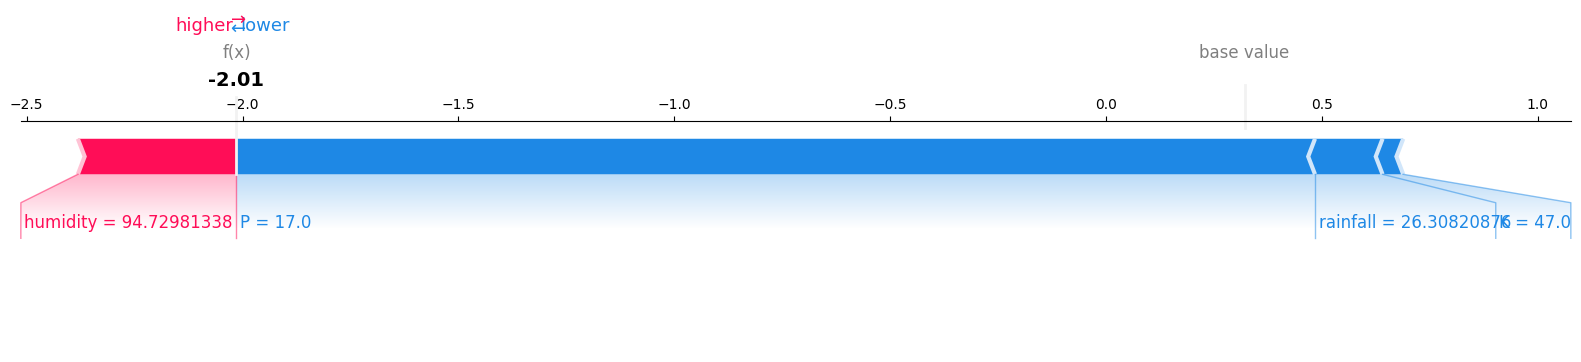

Class: banana


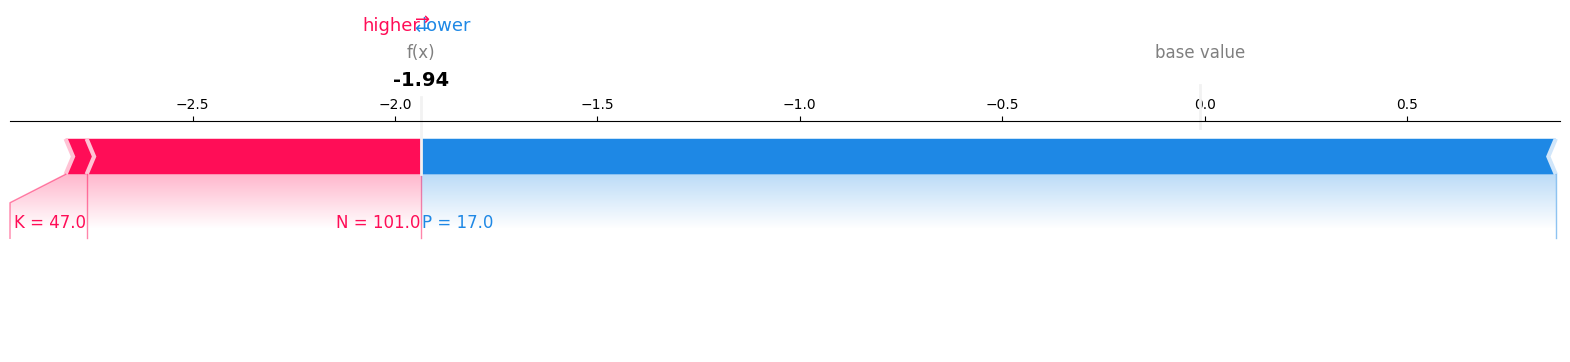

Class: blackgram


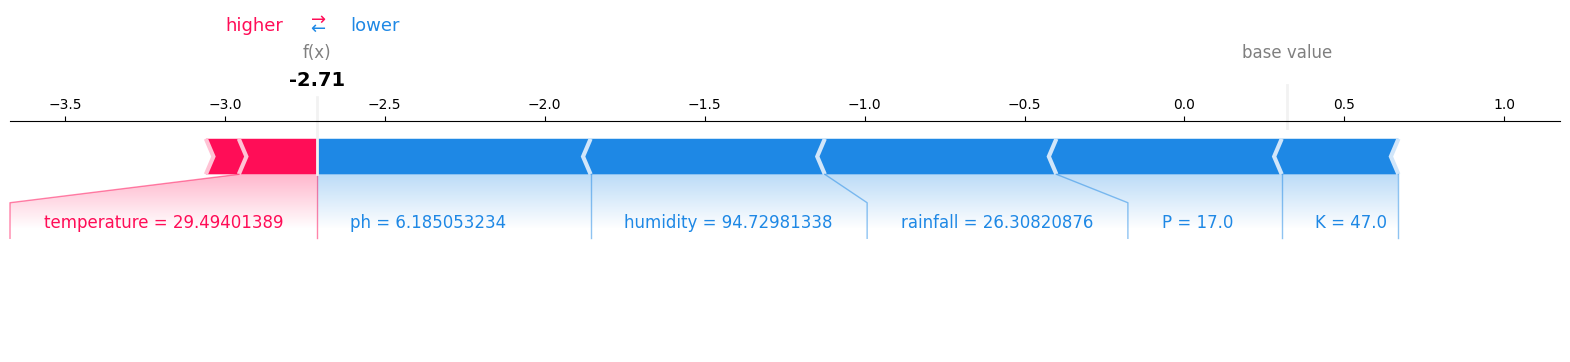

Class: chickpea


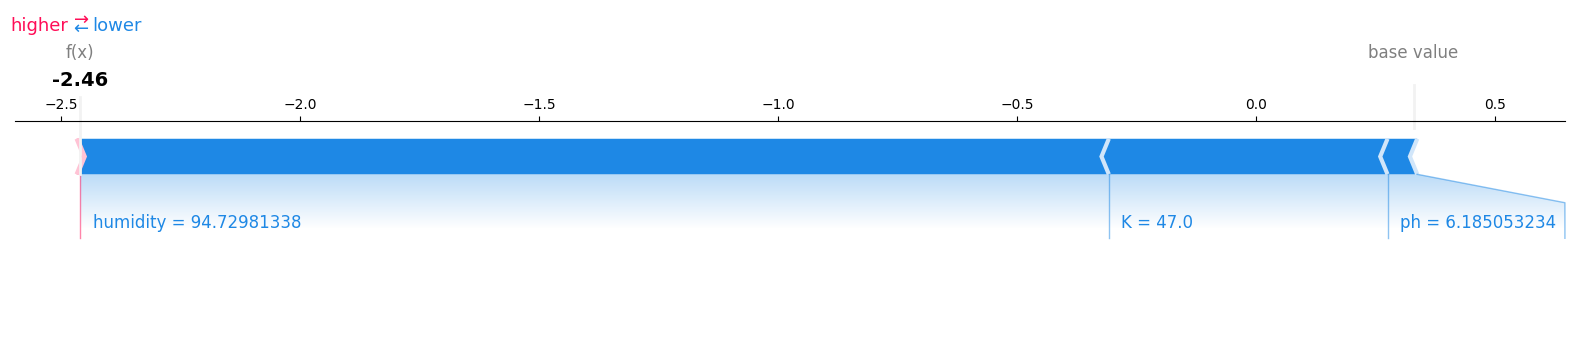

Class: coconut


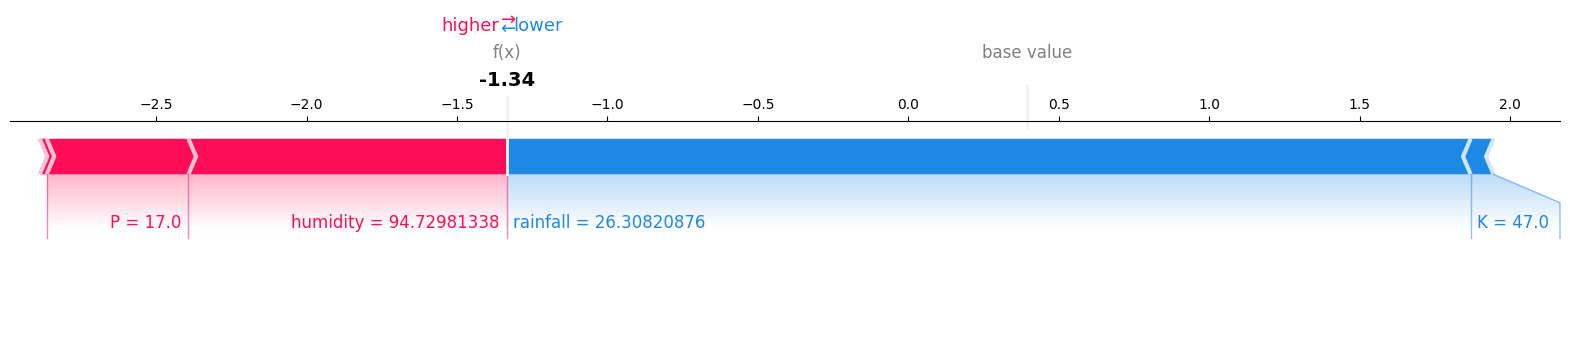

Class: coffee


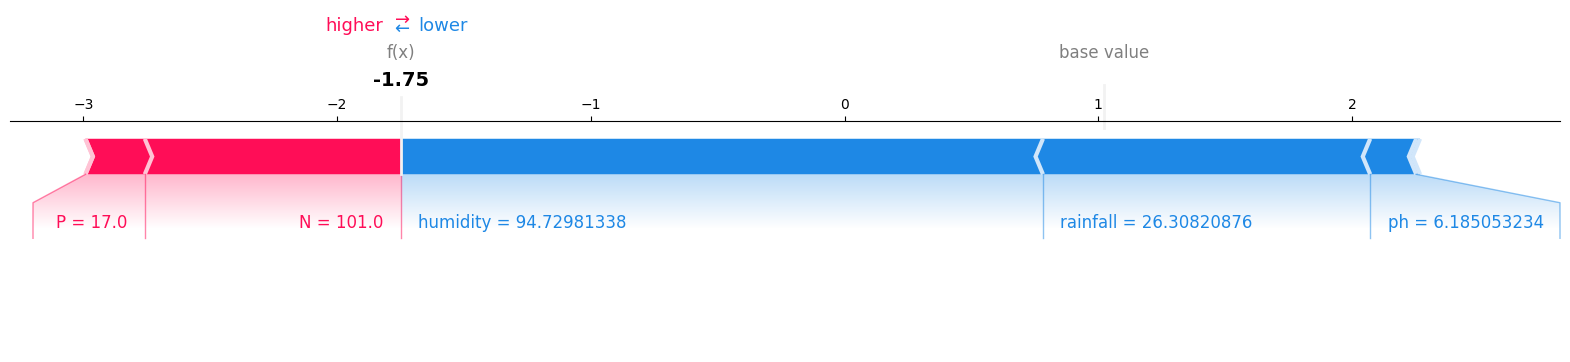

Class: cotton


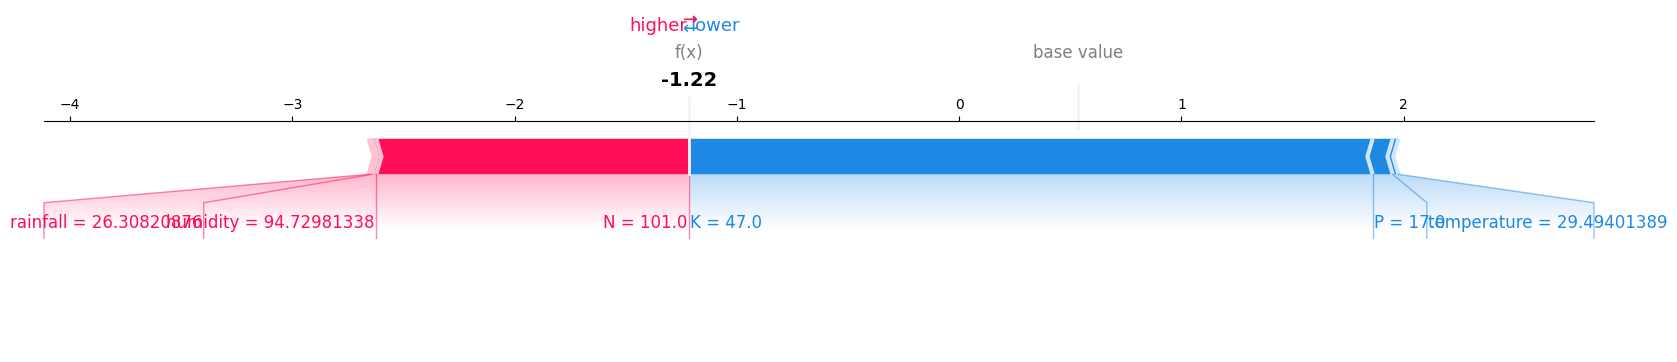

Class: grapes


IndexError: index 7 is out of bounds for axis 2 with size 7

In [29]:
# Anzahl der Klassen aus dem LabelEncoder
num_classes = len(label_encoder.classes_)

# Beispiel-Datenpunkt
sample_idx = 0

# Force-Plots für jede Klasse generieren
for class_idx in range(num_classes):
    print(f"Class: {label_encoder.classes_[class_idx]}")
    shap.force_plot(
        explainer.expected_value[class_idx],          # Erwartungswert der Klasse
        shap_values_trimmed[sample_idx, :, class_idx], # SHAP-Werte für die Klasse
        X_test.iloc[sample_idx, :],                   # Eingabemerkmale
        matplotlib=True                               # Statische Darstellung aktivieren
    )
